--- Class Distribution ---
Class AD: 79 images
Class CN: 547 images
Class MCI: 328 images

--- Recommended Training Weights ---
Weight for AD: 4.0253
Weight for CN: 0.5814
Weight for MCI: 0.9695

--- Visual Inspection ---


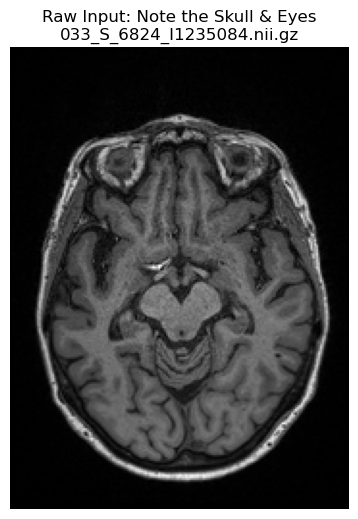

In [ ]:
import os
import glob
import nibabel as nib
import matplotlib.pyplot as plt
import numpy as np

# --- CONFIG ---
dataset_path = "../data" 
classes = ["AD", "CN", "MCI"]

# 1. CHECK CLASS IMBALANCE
print("--- Class Distribution ---")
counts = {}
for label in classes:
    path = os.path.join(dataset_path, label)
    n_files = len(glob.glob(os.path.join(path, "*.nii.gz")))
    counts[label] = n_files
    print(f"Class {label}: {n_files} images")

# Calculate Weights (Inverse Class Frequency)
total = sum(counts.values())
print("\n--- Recommended Training Weights ---")
for label, count in counts.items():
    if count > 0:
        weight = total / (len(classes) * count)
        print(f"Weight for {label}: {weight:.4f}")
    else:
        print(f"Weight for {label}: Undefined (0 images)")

# Let's look at one random AD brain to see the skull/eyes
print("\n--- Visual Inspection ---")
ad_files = glob.glob(os.path.join(dataset_path, "AD", "*.nii.gz"))
if ad_files:
    img_path = ad_files[0]
    img = nib.load(img_path).get_fdata()
    
    # Pick middle slice
    mid_slice = img.shape[2] // 2
    
    plt.figure(figsize=(6,6))
    plt.imshow(img[:, :, mid_slice].T, cmap="gray", origin="lower")
    plt.title(f"Raw Input: Note the Skull & Eyes\n{os.path.basename(img_path)}")
    plt.axis('off')
    plt.show()
else:
    print("No AD images found to visualize.")